# **Term Project Notebook**

**Team NASA - CS 6330 - Spring Semester 2024**


Taylor Radtke - tradtke@angelo.edu

Caden Jones - caden.jones@angelo.edu

Omokunle Oguntade - ooguntade@angelo.edu

Alexander Ametu - aametu@angelo.edu

Ralph Stout - rstout@angelo.edu

In [ ]:
# Import packages for classification, evaluation, and visualization
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import axes3d


**Reading Data**

In [ ]:
# Mounting the drive for access to data
import os
from google.colab import drive
drive.mount('/content/drive/')
flist = os.listdir('drive/MyDrive/Barrios-ASU - ISS Consumables Data Package/csv')

# Outputs the first CSV file in the Barrios folder
import pandas as pd
dir = 'drive/MyDrive/Barrios-ASU - ISS Consumables Data Package/csv/'
df = pd.read_csv(dir + flist[0])

# Uses groupby method to format data by category_name
df.groupby('category_name').count()

Mounted at /content/drive/


,datedim,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,location_name,original_ip_owner,...,state,status,is_container,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID
category_name,,,,,,,,,,,,,,,,,,,,,
ACY Inserts,52671,52671,52671,52671,52671,52671,52671,52671,52671,52671,...,51346,52671,52671,52671,52671,52671,52671,52671,12,52671
EDV,18638,18638,18638,18638,18638,18638,18638,18638,18638,18638,...,18638,18638,18638,18638,18638,18638,18638,18638,585,18638
Filter Inserts,17255,17255,17255,17255,17255,17255,17255,17255,17255,17255,...,16493,17255,17255,17255,17255,17255,17255,17255,0,17255
Food,124730,124730,124730,124730,124730,124730,124730,124730,124730,124730,...,124730,124730,124730,124730,123834,76,124730,124730,13463,124730
Food-RS,34446,34446,34446,34446,34446,34446,34446,34446,34446,34446,...,23732,34446,34446,34446,34446,0,34446,34446,155,34446
Food-US,159306,159306,159306,159306,159306,159306,159306,159306,159306,159306,...,159306,159306,159306,159306,155990,236,159306,159306,12367,159306
KTO,117963,117963,117963,117963,117963,117963,117963,117963,117963,117963,...,115094,117865,117963,117963,117194,117194,117963,117963,1141,117963
Pretreat Tanks,8978,8978,8978,8978,8978,8978,8978,8978,8978,8978,...,8714,8978,8978,8978,8978,8978,8978,8978,0,8978


In [ ]:
# Uses pivot_table method to view the mean tree_depth for each category_name
df.pivot_table(index='category_name', values='tree_depth', aggfunc='mean')

,tree_depth
category_name,
ACY Inserts,5.043345
EDV,5.197875
Filter Inserts,6.362272
Food,5.402870
Food-RS,4.489549
Food-US,5.280529
KTO,5.239685
Pretreat Tanks,6.019381


The first results we see are indicative of the sorting of data through the use of the df.groupby method. The data is sorted and output as each unique category_name and its measurements. This essentially sorts a 5,000,000 row dataset file into an easier-to-read 8 row file. The second set of results seen are through the use of the df.pivot_table method. Using the parameters specified, we are able to sort the data by mean tree_depth for each unique category_name.

We will use problem solving and analysis to determine whether or not each column, or feature, in the dataset is numerical or categorical. This will help us understand our dataset and results at a deeper level when analyzing and manipulation the data.

In [ ]:
'''
Numerical Features:
1. tree_depth
2. part_number
3. serial_number
4. status
5. system
6. subsystem
7. action_date
8. move_dat
9. categoryID

Categorical Features:
1. datedim
2. id
3. id_parent
4. id_path
5. location_name
6. original_ip_owner
7. state
8. is_container
9. is_moveable
10. fill_status
11. category_name
'''

We recognized the numerical features by identifying whether the features represents numerical values, can be subject to arithmetic operations, or includes measurements in quantities. We recognized the categorical features by identifying whether the feature represented categories or labels, cannot be subject to arithmetic operations, and classifies certain parts of the data. With these results, we can better understand our dataset for subsequent steps.

**Data Cleanup and Enhancement**

Data manipulation methods using Python and sklearn are important for structuring the dataset. Imputer and Scaler will be applied in order to organize the dataset.

In [ ]:
#Selects columns with numerical values
numericalColumns = ['tree_depth']

# Provides input for missing values in the numerical column
imputer = SimpleImputer(strategy='mean')
df[numericalColumns] = imputer.fit_transform(df[numericalColumns])
df

,datedim,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,location_name,original_ip_owner,...,status,is_container,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID,category_name
0,1/1/2022 10:01,364155,265,/0/101/265/364155/,3.0,Storage Location,11Ф615.8720А55-20,1180,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
1,1/1/2022 10:01,364156,265,/0/101/265/364156/,3.0,Storage Location,11Ф615.8720А55-20,1181,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
2,1/1/2022 10:01,364157,265,/0/101/265/364157/,3.0,Storage Location,11Ф615.8720А55-20,1182,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
3,1/1/2022 10:01,364158,265,/0/101/265/364158/,3.0,Storage Location,11Ф615.8720А55-10,1182,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
4,1/1/2022 10:01,364160,265,/0/101/265/364160/,3.0,Storage Location,11Ф615.8720А55-20,1184,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533982,9/5/2023 15:20,496349,422154,/0/87242/87249/87279/422154/496349/,5.0,Storage Location,10182.5514.000,2203414,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533983,9/5/2023 15:20,496351,422154,/0/87242/87249/87279/422154/496351/,5.0,Storage Location,10182.5514.000,2102396,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533984,9/5/2023 15:20,496353,422154,/0/87242/87249/87279/422154/496353/,5.0,Storage Location,10182.5514.000,2102399,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533985,9/5/2023 15:20,496357,422154,/0/87242/87249/87279/422154/496357/,5.0,Storage Location,10182.5514.000,2102394,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts


In [ ]:
# Scales numerical features by using the StandardScaler
scaler = StandardScaler()
df[numericalColumns] = scaler.fit_transform(df[numericalColumns])
df

,datedim,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,location_name,original_ip_owner,...,status,is_container,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID,category_name
0,1/1/2022 10:01,364155,265,/0/101/265/364155/,-2.326945,Storage Location,11Ф615.8720А55-20,1180,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
1,1/1/2022 10:01,364156,265,/0/101/265/364156/,-2.326945,Storage Location,11Ф615.8720А55-20,1181,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
2,1/1/2022 10:01,364157,265,/0/101/265/364157/,-2.326945,Storage Location,11Ф615.8720А55-20,1182,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
3,1/1/2022 10:01,364158,265,/0/101/265/364158/,-2.326945,Storage Location,11Ф615.8720А55-10,1182,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
4,1/1/2022 10:01,364160,265,/0/101/265/364160/,-2.326945,Storage Location,11Ф615.8720А55-20,1184,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533982,9/5/2023 15:20,496349,422154,/0/87242/87249/87279/422154/496349/,-0.276914,Storage Location,10182.5514.000,2203414,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533983,9/5/2023 15:20,496351,422154,/0/87242/87249/87279/422154/496351/,-0.276914,Storage Location,10182.5514.000,2102396,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533984,9/5/2023 15:20,496353,422154,/0/87242/87249/87279/422154/496353/,-0.276914,Storage Location,10182.5514.000,2102399,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533985,9/5/2023 15:20,496357,422154,/0/87242/87249/87279/422154/496357/,-0.276914,Storage Location,10182.5514.000,2102394,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts


We defined the numerical column that we wanted to use for data manipulation and structuring. After defining this as tree_depth, we use Imputer from sklearn to impute missing values in the tree_depth column, given any were found. Next, we used Scaler from sklearn to scale the numerical features in the tree_depth column. Both of these methods from sklearn allow for the data to be structured properly.

With the large amount of data given in the Barrios dataset, removing outliers and replacing missing data is very important. In order to do this, df.dropna() and df.fillna() would both be useful.

In [ ]:
# Remove duplicates from dataset
df.drop_duplicates(inplace=True)
df

,datedim,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,location_name,original_ip_owner,...,status,is_container,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID,category_name
0,1/1/2022 10:01,364155,265,/0/101/265/364155/,-2.326945,Storage Location,11Ф615.8720А55-20,1180,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
1,1/1/2022 10:01,364156,265,/0/101/265/364156/,-2.326945,Storage Location,11Ф615.8720А55-20,1181,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
2,1/1/2022 10:01,364157,265,/0/101/265/364157/,-2.326945,Storage Location,11Ф615.8720А55-20,1182,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
3,1/1/2022 10:01,364158,265,/0/101/265/364158/,-2.326945,Storage Location,11Ф615.8720А55-10,1182,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
4,1/1/2022 10:01,364160,265,/0/101/265/364160/,-2.326945,Storage Location,11Ф615.8720А55-20,1184,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533982,9/5/2023 15:20,496349,422154,/0/87242/87249/87279/422154/496349/,-0.276914,Storage Location,10182.5514.000,2203414,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533983,9/5/2023 15:20,496351,422154,/0/87242/87249/87279/422154/496351/,-0.276914,Storage Location,10182.5514.000,2102396,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533984,9/5/2023 15:20,496353,422154,/0/87242/87249/87279/422154/496353/,-0.276914,Storage Location,10182.5514.000,2102399,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533985,9/5/2023 15:20,496357,422154,/0/87242/87249/87279/422154/496357/,-0.276914,Storage Location,10182.5514.000,2102394,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts


In [ ]:
# Compute mean values of numeric features
mean = df.mean(numeric_only=True)
df.fillna(value=mean, inplace=True)
df

,datedim,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,location_name,original_ip_owner,...,status,is_container,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID,category_name
0,1/1/2022 10:01,364155,265,/0/101/265/364155/,-2.326945,Storage Location,11Ф615.8720А55-20,1180,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
1,1/1/2022 10:01,364156,265,/0/101/265/364156/,-2.326945,Storage Location,11Ф615.8720А55-20,1181,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
2,1/1/2022 10:01,364157,265,/0/101/265/364157/,-2.326945,Storage Location,11Ф615.8720А55-20,1182,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
3,1/1/2022 10:01,364158,265,/0/101/265/364158/,-2.326945,Storage Location,11Ф615.8720А55-10,1182,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
4,1/1/2022 10:01,364160,265,/0/101/265/364160/,-2.326945,Storage Location,11Ф615.8720А55-20,1184,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533982,9/5/2023 15:20,496349,422154,/0/87242/87249/87279/422154/496349/,-0.276914,Storage Location,10182.5514.000,2203414,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533983,9/5/2023 15:20,496351,422154,/0/87242/87249/87279/422154/496351/,-0.276914,Storage Location,10182.5514.000,2102396,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533984,9/5/2023 15:20,496353,422154,/0/87242/87249/87279/422154/496353/,-0.276914,Storage Location,10182.5514.000,2102399,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533985,9/5/2023 15:20,496357,422154,/0/87242/87249/87279/422154/496357/,-0.276914,Storage Location,10182.5514.000,2102394,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts


In [ ]:
# Remove rows with missing values for both Part and serial Numbers
df.dropna(subset=['part_number', 'serial_number'], how='all', inplace=True)
df

,datedim,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,location_name,original_ip_owner,...,status,is_container,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID,category_name
0,1/1/2022 10:01,364155,265,/0/101/265/364155/,-2.326945,Storage Location,11Ф615.8720А55-20,1180,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
1,1/1/2022 10:01,364156,265,/0/101/265/364156/,-2.326945,Storage Location,11Ф615.8720А55-20,1181,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
2,1/1/2022 10:01,364157,265,/0/101/265/364157/,-2.326945,Storage Location,11Ф615.8720А55-20,1182,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
3,1/1/2022 10:01,364158,265,/0/101/265/364158/,-2.326945,Storage Location,11Ф615.8720А55-10,1182,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
4,1/1/2022 10:01,364160,265,/0/101/265/364160/,-2.326945,Storage Location,11Ф615.8720А55-20,1184,ФГБ1ГА,Russian Space Agency,...,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533982,9/5/2023 15:20,496349,422154,/0/87242/87249/87279/422154/496349/,-0.276914,Storage Location,10182.5514.000,2203414,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533983,9/5/2023 15:20,496351,422154,/0/87242/87249/87279/422154/496351/,-0.276914,Storage Location,10182.5514.000,2102396,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533984,9/5/2023 15:20,496353,422154,/0/87242/87249/87279/422154/496353/,-0.276914,Storage Location,10182.5514.000,2102399,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts
533985,9/5/2023 15:20,496357,422154,/0/87242/87249/87279/422154/496357/,-0.276914,Storage Location,10182.5514.000,2102394,NOD3A2,NASA,...,Stowed,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts


After removing the duplicates from the dataset using the df.drop_duplicates() method to ensure accuracy and lack of redundant data, we computed the mean of all numeric_only features using the df.fillna() method to dampen the outliers. From here, we were able to remove the rows within the dataset that contained missing values in both the part_number and serial_number columns using the df.dropna() method to ensure neatness and validity of our dataset.

Concatenation and the df.apply() method can be used to enrich the data from the Barrios dataset. It is important to use each of these where they are truly applicable in order to combine or introduce signifcant data.

In [ ]:
# Concatenates 'part_number' and 'serial_number' to create a new feature 'item_identifier'
df['item_identifier'] = df['part_number'] + '_' + df['serial_number']
df

,datedim,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,location_name,original_ip_owner,...,is_container,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID,category_name,item_identifier
0,1/1/2022 10:01,364155,265,/0/101/265/364155/,-2.326945,Storage Location,11Ф615.8720А55-20,1180,ФГБ1ГА,Russian Space Agency,...,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-20_1180
1,1/1/2022 10:01,364156,265,/0/101/265/364156/,-2.326945,Storage Location,11Ф615.8720А55-20,1181,ФГБ1ГА,Russian Space Agency,...,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-20_1181
2,1/1/2022 10:01,364157,265,/0/101/265/364157/,-2.326945,Storage Location,11Ф615.8720А55-20,1182,ФГБ1ГА,Russian Space Agency,...,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-20_1182
3,1/1/2022 10:01,364158,265,/0/101/265/364158/,-2.326945,Storage Location,11Ф615.8720А55-10,1182,ФГБ1ГА,Russian Space Agency,...,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-10_1182
4,1/1/2022 10:01,364160,265,/0/101/265/364160/,-2.326945,Storage Location,11Ф615.8720А55-20,1184,ФГБ1ГА,Russian Space Agency,...,1,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-20_1184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533982,9/5/2023 15:20,496349,422154,/0/87242/87249/87279/422154/496349/,-0.276914,Storage Location,10182.5514.000,2203414,NOD3A2,NASA,...,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts,10182.5514.000_2203414
533983,9/5/2023 15:20,496351,422154,/0/87242/87249/87279/422154/496351/,-0.276914,Storage Location,10182.5514.000,2102396,NOD3A2,NASA,...,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts,10182.5514.000_2102396
533984,9/5/2023 15:20,496353,422154,/0/87242/87249/87279/422154/496353/,-0.276914,Storage Location,10182.5514.000,2102399,NOD3A2,NASA,...,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts,10182.5514.000_2102399
533985,9/5/2023 15:20,496357,422154,/0/87242/87249/87279/422154/496357/,-0.276914,Storage Location,10182.5514.000,2102394,NOD3A2,NASA,...,1,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts,10182.5514.000_2102394


In [ ]:
# Creates a new feature 'in_stock' based on the 'status' column
df['in_stock'] = df['status'].apply(lambda x: 1 if x == 'Stowed' else 0)
df

,datedim,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,location_name,original_ip_owner,...,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID,category_name,item_identifier,in_stock
0,1/1/2022 10:01,364155,265,/0/101/265/364155/,-2.326945,Storage Location,11Ф615.8720А55-20,1180,ФГБ1ГА,Russian Space Agency,...,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-20_1180,1
1,1/1/2022 10:01,364156,265,/0/101/265/364156/,-2.326945,Storage Location,11Ф615.8720А55-20,1181,ФГБ1ГА,Russian Space Agency,...,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-20_1181,1
2,1/1/2022 10:01,364157,265,/0/101/265/364157/,-2.326945,Storage Location,11Ф615.8720А55-20,1182,ФГБ1ГА,Russian Space Agency,...,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-20_1182,1
3,1/1/2022 10:01,364158,265,/0/101/265/364158/,-2.326945,Storage Location,11Ф615.8720А55-10,1182,ФГБ1ГА,Russian Space Agency,...,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-10_1182,1
4,1/1/2022 10:01,364160,265,/0/101/265/364160/,-2.326945,Storage Location,11Ф615.8720А55-20,1184,ФГБ1ГА,Russian Space Agency,...,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-20_1184,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533982,9/5/2023 15:20,496349,422154,/0/87242/87249/87279/422154/496349/,-0.276914,Storage Location,10182.5514.000,2203414,NOD3A2,NASA,...,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts,10182.5514.000_2203414,1
533983,9/5/2023 15:20,496351,422154,/0/87242/87249/87279/422154/496351/,-0.276914,Storage Location,10182.5514.000,2102396,NOD3A2,NASA,...,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts,10182.5514.000_2102396,1
533984,9/5/2023 15:20,496353,422154,/0/87242/87249/87279/422154/496353/,-0.276914,Storage Location,10182.5514.000,2102399,NOD3A2,NASA,...,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts,10182.5514.000_2102399,1
533985,9/5/2023 15:20,496357,422154,/0/87242/87249/87279/422154/496357/,-0.276914,Storage Location,10182.5514.000,2102394,NOD3A2,NASA,...,1,ECLSS,WHC,8/8/2023 16:42,8/8/2023 16:42,NaN,5,Filter Inserts,10182.5514.000_2102394,1


We enriched the data by creating a new feature in the dataset called item_identifier, which is a concatenation of both part_number and serial_number. We also created a new feature called in_stock, which allows for a simple glance at the dataset to see which items are in stock or not based on the status value and whether or not it is stowed.

**Visual Analysis**

Data visualization is the graphical representation of information and data. We will use several methods to represent our data.

We will show examples of Seaborn single feature plots and how they interact with the Barrios dataset. This will give us a better understand of single feature plots and how they can be used to our advantage.

<Axes: xlabel='tree_depth', ylabel='Count'>

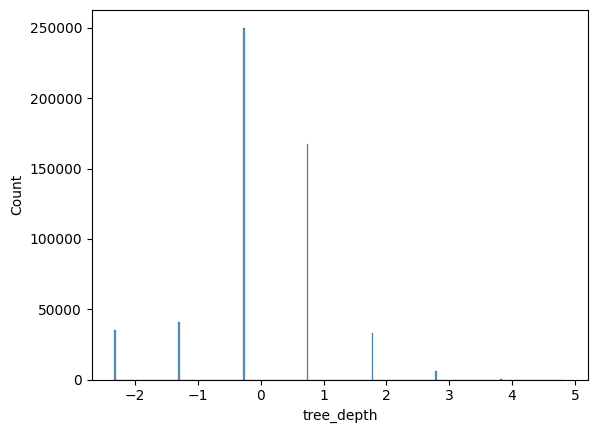

In [ ]:
# Uses histplot method
import seaborn as sns
sns.histplot(df, x='tree_depth')

In [ ]:
df.head()

,datedim,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,location_name,original_ip_owner,...,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID,category_name,item_identifier,in_stock
0,1/1/2022 10:01,364155,265,/0/101/265/364155/,-2.326945,Storage Location,11Ф615.8720А55-20,1180,ФГБ1ГА,Russian Space Agency,...,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-20_1180,1
1,1/1/2022 10:01,364156,265,/0/101/265/364156/,-2.326945,Storage Location,11Ф615.8720А55-20,1181,ФГБ1ГА,Russian Space Agency,...,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-20_1181,1
2,1/1/2022 10:01,364157,265,/0/101/265/364157/,-2.326945,Storage Location,11Ф615.8720А55-20,1182,ФГБ1ГА,Russian Space Agency,...,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-20_1182,1
3,1/1/2022 10:01,364158,265,/0/101/265/364158/,-2.326945,Storage Location,11Ф615.8720А55-10,1182,ФГБ1ГА,Russian Space Agency,...,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-10_1182,1
4,1/1/2022 10:01,364160,265,/0/101/265/364160/,-2.326945,Storage Location,11Ф615.8720А55-20,1184,ФГБ1ГА,Russian Space Agency,...,1,SM Hygiene Sanitary Equipment,АсСУ,10/10/2020 19:22,10/10/2020 19:22,NaN,3,KTO,11Ф615.8720А55-20_1184,1


The hisplot() method displays a histogram of the tree_depth feature. Visually, it appears to show straight lines to demonstrate the count of each tree_depth from the dataset.

<Axes: xlabel='tree_depth', ylabel='Density'>

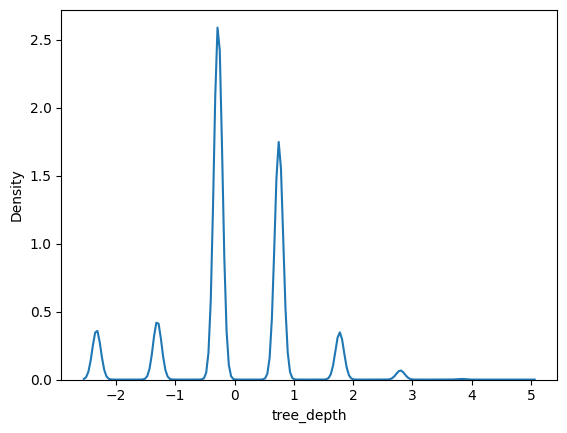

In [ ]:
# Uses kdeplot method
sns.kdeplot(df, x='tree_depth')


The kdeplot() method visualizes our data using a density plot of the tree_depth feature. This appears to be similar to the histplot, but using a different metric, density, and having a different shape to the lines.

<Axes: xlabel='is_moveable', ylabel='count'>

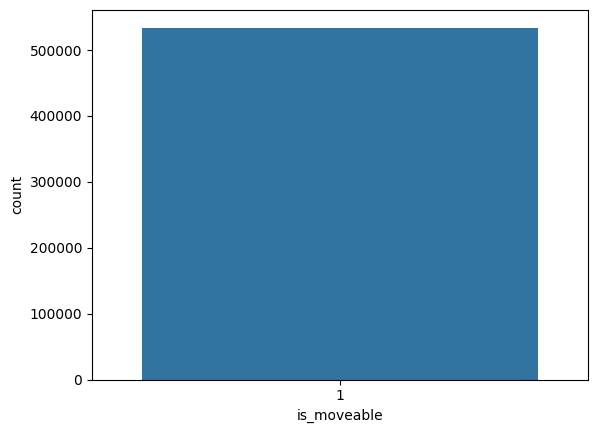

In [ ]:
# Uses countplot method
sns.countplot(df, x='is_moveable')

The countplot() method creates a bar chart from the is_moveable categorical feature rather than a numerical feature. It seems to have created only one bar for a large count.

<Axes: xlabel='tree_depth'>

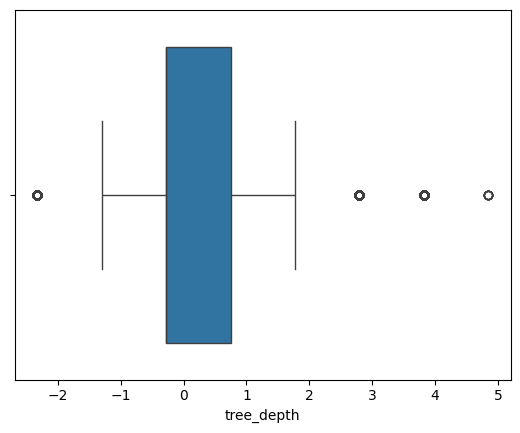

In [ ]:
# Uses boxplot method
sns.boxplot(df, x='tree_depth')

The boxplot() method seems to only use the x-axis and simply creates a box plot from the tree_depth numerical feature from the dataset.

<Axes: xlabel='tree_depth'>

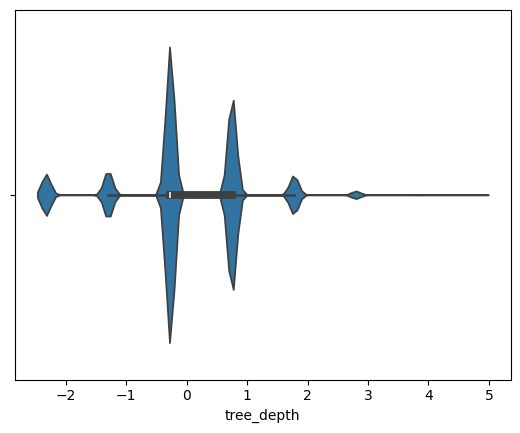

In [ ]:
# Uses violinplot method
sns.violinplot(df, x='tree_depth')

Similar to the boxplot() method, the violinplot() method uses only the x-axis in its graphing. It appears to create a violin plot based on the tree_depth numerical feature within the dataset.

Through using and exploring each single feature plot using Seaborn and its multiple methods, we were able to visualize our data in multiple new ways. This allows for easier analysis and business intelligence of our data and provides us with multiple options for visualizing both numerical and categorical features in different ways.

In order to complement our plots above, using scatterplots and stripplots we are able to see both the relationship between two variables as well as the distribution. Using the style and hue parameters, we are able to add another feature to compare.

<Axes: xlabel='tree_depth', ylabel='id'>

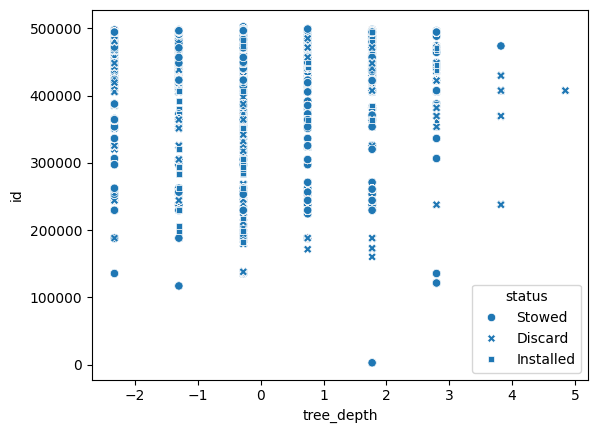

In [ ]:
# Using a Scatterplot
sns.scatterplot(df, x='tree_depth', y='id', style='status')

Using a scatterplot creates a graph with structured, scattered lines comprised of circles, squarts, and exes to represent the status of the tree_depth.

In [ ]:
# Using a Stripplot
sns.stripplot(df, x='tree_depth', y='id', hue='status')

Using a stripplot creates a graph showcasing the same thing as a swarmplot, but using different items within the graph.

From the two plots above, we are able to compare the single-feature plots (ex. violin) in order to see both the distinct points and underlying distributions of the data.

The hist() function returns a histogram chart for every column in a dataframe unless the columns argument is provided. In this case we used tree_depth, calculated_volume, children_volume, and cetegoryID as they provided the most useful data as displayed in the chart.

In [ ]:
# Histogram
df.hist(column=['tree_depth', 'calculated_volume', 'children_volume', 'categoryID'], figsize=(12,8))

The boxplot() function returns a box plot for the same columns as used in the histogram above.

In [ ]:
#Boxplot
df.boxplot(column=['tree_depth', 'calculated_volume', 'children_volume', 'categoryID'], figsize=(16, 6))

In [ ]:
# Convert the 'datedim' column to datetime if it's not already in datetime format
df['datedim'] = pd.to_datetime(df['datedim'])

# Select only numerical columns for the pairplot
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create the pairplot
sns.pairplot(df[numerical_columns])

# Show the plot
plt.show()

We used Turkey's Fences to determine outliers in box plots and calculate the interquartile range, IQR = Q3 − Q1 for a feature. We then classified all points that fall 1.5 IQR above Q3 or 1.5 IQR below Q1 as outliers. Next, we can calculate the z-score, z=(value-mean)/(Standard Deviation) for each value, as well as classify all points that have a z-score of |z| > 3 as outliers.

Code below creates data visualizations and calculates z-scores for features in the Barrios-ASU - ISS Consumables Data Package dataset.

In [ ]:
# Box plot of tree_depth by tree
p = sns.boxplot(data=df, x='tree_depth', y='tree')
p.set_xlabel('tree', fontsize=14)
p.set_ylabel('tree_depth', fontsize=14)
plt.show()

In [ ]:
# Calculate z-scores of tree depth for each tree
treeGroups = df.groupby('tree')

# z-score = a measure of how far an observation is from the mean
# z-score = (obs-mean)/SD
df[''] = treeGroups['tree_depth'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Sort the result by the largest absolute z-score
df.sort_values(by=['tree_depth'], ascending=False, key=lambda x: abs(x)).head(6)

In [ ]:
# Create a subset containing only storage location trees
storageLocation = df[df['tree'] == 'Storage Location']

plt.rcParams["figure.figsize"] = (10, 5)

p = sns.lmplot(
    data=storageLocation,
    x='quantity',
    y='tree_depth',
    scatter_kws={'alpha': 0.3, 'color': '#10a60e'},
    ci=False,
)
p.set_axis_labels('quantity', 'tree_depth', fontsize=14)
plt.plot(59.6, 17, 'go')
plt.text(59.6 + 0.5, 17, 'A', fontsize=16)
plt.plot(44.4, 17.3, 'go')
plt.text(44.4 + 0.5, 17.3, 'B', fontsize=16)
plt.plot(40.9, 13.7, 'go')
plt.text(40.9 - 1.5, 13.7, 'C', fontsize=16)

From our above boxplots, we are able to see several tree_depth and tree_depth outliers. This allows us to make analytical decision based on these outliers and whether or not they need to be cleaned when presented as a refined dataset or visualization.



Python code below creates data visualizations and calculates z-scores for features in the Barrios-ASU - ISS Consumables Data Package dataset.

In [ ]:
# Box plot of tree depth by tree
p = sns.boxplot(data=df, x='tree_depth', y='tree')
p.set_xlabel('tree', fontsize=14)
p.set_ylabel('tree_depth', fontsize=14)
plt.show()

In [ ]:
# Calculate z-scores of tree depth for each tree
treeGroups = df.groupby('tree')

# z-score = a measure of how far an observation is from the mean
# z-score = (obs-mean)/SD
df[''] = treeGroups['tree_depth'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Sort the result by the largest absolute z-score
df.sort_values(by=['tree_depth'], ascending=False, key=lambda x: abs(x)).head(6)

In [ ]:
# Create a subset containing only storage location trees
storageLocation = df[df['tree'] == 'Storage Location']

plt.rcParams["figure.figsize"] = (10, 5)

p = sns.lmplot(
    data=storageLocation,
    x='quantity',
    y='tree_depth',
    scatter_kws={'alpha': 0.3, 'color': '#10a60e'},
    ci=False,
)
p.set_axis_labels('quantity', 'tree_depth', fontsize=14)
plt.plot(59.6, 17, 'go')
plt.text(59.6 + 0.5, 17, 'A', fontsize=16)
plt.plot(44.4, 17.3, 'go')
plt.text(44.4 + 0.5, 17.3, 'B', fontsize=16)
plt.plot(40.9, 13.7, 'go')
plt.text(40.9 - 1.5, 13.7, 'C', fontsize=16)

**Validation Analysis**

Data validation is checking the accuracy and quality of source data before using, importing or processing data. There are different types of validation that can be performed.

We will identify two attributes that are in the consumables usage dataset and create a model of linear regression with these two attributes by using sklearn.linear_model.LinearRegression. We can then measure the model's performance and then optimize it to ensure that the model is performing highly. Last, we will use matplotlib to demonstrate the observed and predicted values.

In [ ]:
# Outputs the first CSV file in the Barrios folder
df = pd.read_csv(dir + flist[0])
print(df.head())

# Identifying two attributes from the dataset
# For example, let's select 'quantity' and 'calculated_volume'
attributes = ['quantity', 'calculated_volume']
# Dropping rows with missing values
df.dropna(subset=['quantity', 'calculated_volume'], inplace=True)

# Splitting the data into features (X) and target variable (y)
X = df[attributes]
y = df['calculated_volume']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting on the testing data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Visualizing the observed vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("Observed vs Predicted Values")
plt.show()


In this section, we use two attributes, calculated_volume and tree_depth, to create a linear regression model. We were able to evaluate the model's performance and then optimize it to ensure it is at the highest performance. We then created a plot to view the observed and predicted values to enhance our dataset and analysis.

In this section, we will identify two or more attributes in the dataset. From here, we will create a multiple linear regression model using both the attributes and sklearn.linear_model.LinearRegression. After this, we can evaluate the performance of the model and revise it to make sure the performance is high. Lastly, we will include a plot using mplot3d to demonstrate the observed and predicted values.

In [ ]:
# Show info in order to find applicable attributes for regression

df.info()

From the above information, adding is_movable to our regression is applicable to our other regression attributes of tree_depth and calculated_volume.

In [ ]:
# Split the data into features (X) and target variable (y)
X = df[attributes]
y = df['calculated_volume']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plot observed vs predicted values using mplot3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot

The plot likely did no display because the plot's MSE is very close, if not, zero. This means there is a very small amount of error between the observed and predicted values.

In [ ]:
# Define the figure
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')

# Assigning values for the plot
x = df['tree_depth'].values.reshape(-1,1)
y = df['calculated_volume'].values.reshape(-1,1).astype(int)
z = df['is_moveable'].values.reshape(-1,1)

# Making the scatterplot
ax1.scatter(x,y,z)

ax1.set_xlabel('Tree Depth')
ax1.set_ylabel('Calculated Volume')
ax1.set_zlabel('Is Moveable')

plt.show()

From the above scatterplot, it is difficult to see any information that seems relevant to what we are wanting to learn. Below we will use 'quantity' instead of 'is_moveable' to see if the plot is more useful.

In [ ]:
# Define the figure
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')

# Assigning values for the plot
x = df['tree_depth'].values.reshape(-1,1)
y = df['calculated_volume'].values.reshape(-1,1).astype(int)
z = df['quantity'].values.reshape(-1,1)

# Making the scatterplot
ax1.scatter(x,y,z)

ax1.set_xlabel('Tree Depth')
ax1.set_ylabel('Calculated Volume')
ax1.set_zlabel('Quantity')

plt.show()

In comparing both scatterplots, there are no differences seen easily. By evaluating both plots, we have determined that the performance is equally high and our plots of the dataset attributes are deemed successful.

In this analysis, we will create a logistic regression model using previously identified attributes in the provided dataset as well as sklearn.linear_model.LogisticRegression. We will then evaluate the performance of the created model and ensure that the performance is high. Finally, we will use matplotlib to draw a plot demonstrating the observed and predicted values.

In [ ]:
# Logistic regression model

X = df['tree_depth'].values.reshape(-1, 1)
y = df['calculated_volume'].values.reshape(-1, 1).astype(int)

LogisticModel = LogisticRegression()
LogisticModel.fit(X, np.ravel(y.astype(int)))

plt.scatter(X, y)
xDelta = np.linspace(X.min(), X.max(), 10000)
yPredicted = LogisticModel.predict(X).reshape(-1, 1).astype(int)
yDeltaProb = LogisticModel.predict_proba(xDelta.reshape(-1, 1))[:, 1]
plt.plot(xDelta, yDeltaProb, color='red')
plt.xlabel('Tree Depth', fontsize=14)
plt.ylabel('Calculated Volume', fontsize=14)

In [ ]:
# Forming a scatterplot fo the data

p = sns.scatterplot(data=df, x='tree_depth', y='diameter', alpha=0.5)
p.set_xlabel('tree_depth', fontsize=14)
p.set_ylabel('diameter (1=yes, 0=no)', fontsize=14)
plt.show()

In [ ]:
# Fit regression model and print coefficients
X = df[['tree_depth']].values.reshape(-1, 1)
y = df[['diameter']].values.reshape(-1, 1).astype(int)

logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))

print('Slope coefficient:', logisticModel.coef_)
print('Intercept coefficient:', logisticModel.intercept_)

In [ ]:
# Plot fitted logistic regression model
p = sns.regplot(
    data=df,
    x='tree_depth',
    y='diameter',
    logistic=True,
    ci=False,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'black'},
)
p.set_xlabel('tree_depth', fontsize=14)
p.set_ylabel('diameter (1=yes, 0=no)', fontsize=14)
plt.show()

In this section, we created a logistic regression model using our attributes that were previously defined in prior section from the dataset as well as sklearn.linear_model.LogisticRegression. We then were able to evalue the performance of the model we created to ensure that the performance is high. Once we evaluated our model, we used matplotlib to draw the plot of the observed and predicted values to better understand our data.

**Optimization Analysis**

Data optimization is the process of refining or improving data to make it more efficient, accurate, and useful.

In this analysis, we will apply hierarchical clustering, a type of unsupervised learning algorithm, to the consumables usage dataset. Unsupervised learning is utilized when we don't have labeled data and we are interested in discovering inherent groupings within the data. Hierarchical clustering creates clusters by either a divisive method (starting with one cluster and dividing it into smaller ones) or an agglomerative method (starting with individual points and merging them into larger clusters).

The goal of this project is to examine how different consumables are utilized together, which can help in understanding consumption patterns and optimizing inventory and procurement strategies. Hierarchical clustering will be particularly useful to identify these patterns by grouping similar consumables based on usage characteristics.

In [ ]:
# Load data
flist = os.listdir('drive/MyDrive/Barrios-ASU - ISS Consumables Data Package/csv/')
flist

In [ ]:
flist.sort()
flist

In [ ]:
# Outputs the sixth CSV file in the Barrios folder because the google colab ran out of memory while using flist[0]
dir = 'drive/MyDrive/Barrios-ASU - ISS Consumables Data Package/csv/'
df1 = pd.read_csv(dir + flist[5])
df1

In [ ]:
df1.info()

In the code above, we begin by importing the necessary libraries. Pandas and NumPy are used for data manipulation, Matplotlib and Seaborn for data visualization, and StandardScaler from sklearn for feature scaling. The dataset is loaded into a DataFrame df from a specified path, which you need to replace with the actual path where your data is stored. The .head() function provides a glimpse into the first few rows of the dataset, helping us understand its structure and contents.


Next, we proceed to preprocess the data by handling missing values, scaling the data, and applying hierarchical clustering.

In [ ]:
# Handle missing values if necessary
df1.fillna(method='ffill', inplace=True)

# Assume the dataset contains only numeric columns that are relevant for clustering
X = df1[['rate']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

Here, we handle missing values by forward filling them, which is a common technique in time-series data but can be adjusted based on the dataset nature. Scaling is crucial in clustering because it ensures that each feature contributes equally to the rate calculations.

The linkage() function from the scipy.cluster.hierarchy library performs hierarchical clustering using the Ward's method, which minimizes the variance within each cluster. The result, linkage_matrix, is used to plot a dendrogram, which helps in visualizing the clustering result.

In [ ]:
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('rate')
plt.show()

The dendrogram visualizes the hierarchical clustering process, showing how each point or cluster is merged into larger clusters. Each merge is represented by a horizontal line connecting clusters. The height of the line indicates the distance between merged clusters, providing insight into the cluster structure.

By applying hierarchical clustering to the consumables usage dataset, we were able to identify distinct groups of consumable items based on their usage patterns. The dendrogram provided a detailed visualization of how each item or group of items was merged into larger clusters, indicating their similarity in usage.

This analysis demonstrated the effectiveness of hierarchical clustering in uncovering hidden patterns in unlabeled data, which can be extremely useful for optimizing inventory management and procurement strategies in practical scenarios. The insights gained can help in better understanding consumable needs, predicting future consumption, and planning accordingly.

This project not only showcased the application of an unsupervised learning technique but also highlighted the importance of preprocessing steps such as handling missing data and scaling features. Moving forward, these clusters could be analyzed further to derive more specific strategies for each group of consumables.

**Prediction Analysis**

Predictive analytics is the process of using data to forecast future outcomes.

In [ ]:
# Initialize model
dfKnnRegressor = KNeighborsRegressor(n_neighbors=5)

# Selecting features (X) and target variable (Y)
X = df[['id_parent', 'tree_depth', 'width', 'height', 'length', 'diameter', 'calculated_volume',
        'stwg_ovrrd_vol', 'children_volume', 'stwg_ovrrd_chldrn_vol', 'is_container', 'is_moveable', 'categoryID']]
y = df['quantity']

# Impute NaN values
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Fit model and predict on test data
dfKnnRegressor.fit(X_train_scaled, np.ravel(y_train))
y_pred = dfKnnRegressor.predict(X_test_scaled)

# Plot the actual value vs. the predicted value
plt.scatter(x=y_test, y=y_pred)

In [ ]:
# Compute metrics
print(metrics.mean_squared_error(y_pred, y_test))
print(metrics.r2_score(y_pred, y_test))

We used K-nearest Neighbors (KNN) regression algorithm to predict the quantity of consumables usage based on several features.

The dataset includes various features such as 'id_parent', 'tree_depth', 'width', 'height', etc.. The features are numeric, which is suitable for KNN regression

Missing values in the features are imputed using the mean strategy. The data is split into training and testing sets, with 70% for training and 30% for testing. The features are scaled using StandardScaler to normalize them, which is essential for KNN algorithm as it calculates distances between points. KNN regression model is initialized with n_neighbors=5. The model is fitted to the training data after scaling. Predictions are made on the test set. The mean squared error (MSE) and the R-squared score (R2) are computed to evaluate the model's performance. The scatter plot of actual vs. predicted values is plotted for visual inspection.

The computed metrics show: Mean Squared Error (MSE): 0.0 R-squared Score (R2): 1.0 These results might indicate that the model perfectly predicts the quantities of consumables in the test data, with an MSE of 0 and an R2 score of 1.0, which is the best possible score.

The goal was to show the effectiveness of the algorithm in predicting consumables usage based on provided features. However, achieving an MSE of 0 and an R2 score of 1.0 seems unrealistic and might indicate potential issues such as overfitting.

Unsupervised Learning - Hierarchical Clustering

In this analysis, we will apply hierarchical clustering, a type of unsupervised learning algorithm, to the consumables usage dataset. Unsupervised learning is utilized when we don't have labeled data and we are interested in discovering inherent groupings within the data. Hierarchical clustering creates clusters by either a divisive method (starting with one cluster and dividing it into smaller ones) or an agglomerative method (starting with individual points and merging them into larger clusters).

The goal of this project is to examine how different consumables are utilized together, which can help in understanding consumption patterns and optimizing inventory and procurement strategies. Hierarchical clustering will be particularly useful to identify these patterns by grouping similar consumables based on usage characteristics.

First, let's set up our environment by importing the necessary packages and loading the data.

In [ ]:
# Import packages
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
flist


In [ ]:
flist.sort()
flist

In [ ]:
# Outputs the sixth CSV file in the Barrios folder because the google colab ran out of memory while using flist[0]
dir = 'drive/MyDrive/Barrios-ASU - ISS Consumables Data Package/csv/'
df1 = pd.read_csv(dir + flist[5])
df1

In the code above, we begin by importing the necessary libraries. Pandas and NumPy are used for data manipulation, Matplotlib and Seaborn for data visualization, and StandardScaler from sklearn for feature scaling. The dataset is loaded into a DataFrame df from a specified path, which you need to replace with the actual path where your data is stored. The .head() function provides a glimpse into the first few rows of the dataset, helping us understand its structure and contents.

Next, we proceed to preprocess the data by handling missing values, scaling the data, and applying hierarchical clustering.

In [ ]:
df1.info()

In [ ]:
# Handle missing values if necessary
df1.fillna(method='ffill', inplace=True)

# Assume the dataset contains only numeric columns that are relevant for clustering
X = df1[['rate']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

Here, we handle missing values by forward filling them, which is a common technique in time-series data but can be adjusted based on the dataset nature. Scaling is crucial in clustering because it ensures that each feature contributes equally to the rate calculations.

The linkage() function from the scipy.cluster.hierarchy library performs hierarchical clustering using the Ward's method, which minimizes the variance within each cluster. The result, linkage_matrix, is used to plot a dendrogram, which helps in visualizing the clustering result.

In [ ]:
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('rate')
plt.show()

The dendrogram visualizes the hierarchical clustering process, showing how each point or cluster is merged into larger clusters. Each merge is represented by a horizontal line connecting clusters. The height of the line indicates the distance between merged clusters, providing insight into the cluster structure.

**Results**

Our team used a few different methods to both reach our
results and understand our results. These methods include
supervised and unsupervised learning. For supervised learning,
we used the K-nearest Neighbors (KNN) regression algorithm
to predict the quantity of consumables usage based on several
features including width, height, etc. Once our model was
fitted to the train data after scaling, we computed both the
mean squared error (MSE) and the R-squared score (R2) to
evaluate the model’s performance.

The computed metrics showed that the MSE was equal to
0 and that the R2 was equal to 1. These results indicate that
the model perfectly predict the quantities of consumables in
the test data, with our scores being the best possible. The goal
was to show the effectiveness of the algorithm in predicting
consumable usages based on the provided features to improve
optimization for the Barrios team in their future predictions
and accuracy. However, achieving and MSE of 0 and an R2
score of 1 seems unrealistic and may indicate potential issues
such as over fitting.

We also performed unsupervised learning techniques for our
predictions and to show effectiveness of the algorithm. To
do this, both K-means clustering and hierarchical clustering
were applies on the consumables usage dataset. Firstly, after
using the K-means clustering method, we visualized our results
using a scatter plot. The method essentially applies K-means
clustering with a specified number of clusters (k = 3 in this
case), plots the clusters, and visualized the centroids.
Additionally, it calculates and plots the within-cluster sum
of squares (WCSS) for different values of k to help determine
the optimal number of clusters. Our results show that the
optimal tree depth for a high number of calculated volume
within the dataset is both 5 and 6 with a maximum calculated
volume of 0.7, as seen.

Next, continuing the unsupervised learning technique, we
used hierarchical clustering, a type of unsupervised learning
algorithm. Unsupervised learning is utilized when we do
not have labeled data, yet we are interested in discovering
inherent groupings within the data. Hierarchical clustering
creates clusters by either a divisive method (starting with one
cluster and dividing it into smaller ones) or an agglomerate
method (starting with individual points and merging them into
larger clusters.) The goal of our use of this algorithm was
to examine how different consumables are utilized together,
which can help in understanding consumption patterns and
optimizing inventory and procurement strategies. The algo-
rithm will be particularly useful to identify these patterns by
grouping similar consumables based on usage characteristics.
As a result, we were able to identify distinct groups of
consumable items based on their usage patterns. The data
was visualized as a dendrogram, shown and provided
a detailed visualization of how each item or group of items
was merged into larger clusters, indicating their similarity in
usage.

This analysis demonstrated the effectiveness of hierar-
chical clustering in uncovering hidden patterns in unlabeled
data, which can be extremely useful for optimizing inventory
management and procurement strategies in practical scenarios.
The insights gained can help in better understanding con-
sumable needs predicting future consumption, and planning
accordingly

**Conclusions and Future Work**

The objective of this project was to assess historical data regarding the above ISS parameters and consumables supply to derive historical insights and prescribe predictive outcomes to minimize risks to mission success, refine usage rate assumptions, assess novel data visualization techniques for the effective communication of data-driven answers, and identify upcoming logistics challenges in the strategic planning timeline.

Through this project, we were able to analyze consumables usage data
and extracted significant insights using both supervised and
unsupervised learning techniques. We achieved seemingly
ideal results with an MSE of 0 and an R-squared score of 1,
using supervised learning to forecast consumables’ quantities
based on multiple variables through the use of the K-nearest
Neighbors (KNN) regression algorithm. Although these results
point to exceptional prediction performance, they also raise
questions about possible overfitting because perfect scores
like these usually indicate problems with the model’s ability
to generalize to new data. The visualization offered a more
thorough assessment of the model’s performance by shedding
more light on the true positive and true negative values.

In addition, we investigated unsupervised learning techniques, namely hierarchical and K-means clustering. By identifying the ideal cluster numbers and visualizing the cluster
centroids using K-means clustering, we were able to get
insight into various categories within the dataset. On the
other hand, based on consumption patterns, hierarchical clustering provided a comprehensive dendrogram representation,
exposing innate groupings and commonalities among consumable goods. The utilization of unsupervised methodologies
yielded significant benefits for inventory management and
procurement strategies by enabling the identification of hidden
consumption patterns and the grouping of related products.
Our findings open up various new directions for further study
and development.

First and foremost, it is imperative that we address the
possible overfitting that our supervised learning model has
shown. The resilience and generalization potential of the
model may be improved by employing tactics like cross-
validation, regularization techniques, or investigating other
regression algorithms. Improved clustering algorithms and
the investigation of new attributes may offer deeper insights
into the consumption patterns of consumables, which may
result in the development of more efficient inventory manage-
ment techniques. Including real-time data streams and taking
into account outside variables like supply chain disruptions,
seasonality, and market trends should improve our model's
forecast accuracy and applicability.

Working with subject-matter experts, such as procurement specialists or supply chain managers, can help improve the study by adding subject-matter expertise and guaranteeing practical application.

In summary, our research establishes the foundation for
utilizing data science methods to enhance the forecasting of
consumables usage and inventory control procedures. Our
goal is to enhance decision-making processes, reduce costs,
and optimize resource allocation in supply chain management
scenarios for Barrios by merging supervised and unsupervised
learning approaches.